# ExplainableRL: Onboarding recipe

In [ ]:
! pip install explainable-rl

In [131]:
import warnings
warnings.filterwarnings("ignore")

# Initialisation

In [132]:
# Parameters setting
from parameters import hyperparam_dict_ds_data_predict

hyperparam_dict = hyperparam_dict_ds_data_predict

In [133]:
# Load data
from explainable_rl.foundation import utils

dataset = utils.load_data(data_path=hyperparam_dict['dataset']['data_path'],
                          n_samples=hyperparam_dict['dataset']['n_samples'],
                          delimiter=hyperparam_dict['dataset']['col_delimiter'])

In [134]:
# Split in train ans test sets
train_dataset, test_dataset = utils.split_train_test(dataset)

In [135]:
# Initialize DataHandler
from explainable_rl.data_handler.data_handler import DataHandler

dh = DataHandler(hyperparam_dict=hyperparam_dict, dataset=train_dataset, test_dataset=test_dataset)

In [136]:
# Initilize Engine
from explainable_rl.foundation.engine import Engine

engine = Engine(dh=dh, hyperparam_dict=hyperparam_dict)

In [137]:
# Initialize Agent and Environment
engine.create_world()

# Training

In [138]:
# Train the Agent
engine.train_agent()

100%|████████████████████████████████████| 60000/60000 [05:55<00:00, 168.58it/s]


In [139]:
# Save the trained Agent
utils.save_engine(engine, 'runs/q_learner_demo.pkl')

In [144]:
# Load Agent to inspect
engine = utils.load_engine('runs/q_learner_0.pkl')

In [110]:
# Load lists of Agents to evaluate
engines = utils.load_engine([
    # Q learners
    'runs/q_learner_0.pkl', 'runs/q_learner_1.pkl', 'runs/q_learner_2.pkl',
    'runs/q_learner_3.pkl', 'runs/q_learner_4.pkl', 'runs/q_learner_5.pkl', 
    'runs/q_learner_6.pkl',
    # Double Q learners
    'runs/double_q_learner_1.pkl', 'runs/double_q_learner_2.pkl', 'runs/double_q_learner_3.pkl',
    'runs/double_q_learner_4.pkl', 'runs/double_q_learner_5.pkl', 'runs/double_q_learner_6.pkl',
    'runs/double_q_learner_7.pkl',
    # SARSAs
    'runs/sarsa_1.pkl', 'runs/sarsa_2.pkl', 'runs/sarsa_3.pkl',
    'runs/sarsa_4.pkl', 'runs/sarsa_5.pkl', 'runs/sarsa_6.pkl'
])

# Evaluation

In [111]:
# Initialize Evaluator
from explainable_rl.evaluation.evaluator import Evaluator

evaluator = Evaluator(engines = engines)

KeyboardInterrupt: 

In [ ]:
# Comput historical rewards
print(f"Historical baseline: {evaluator.hist_cum_rewards()}")
print(f"Agent Policy: {evaluator.agent_cum_rewards()}")

In [ ]:
# Plot cumulative reward versus the episodes
evaluator.plot_training_curve()

In [ ]:
# Plot average rewards distribution
evaluator.plot_reward_distribution()

# Explainability

In [145]:
# Plot PDPs
from explainable_rl.explainability.pdp import PDP

pdp = PDP(engine=engine)
pdp.build_data_for_plots()

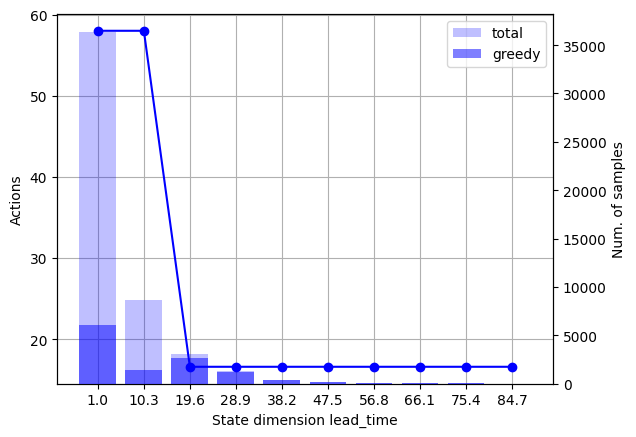

In [150]:
# Plot PDP for feature lead_time (length_of_stay, competitor_price_difference_bin, demand_bin)
fig_name = "PDP plots - lead_time"
pdp.plot_pdp(feature="lead_time", fig_name=fig_name, savefig=False)

In [156]:
# Compute SHAP values
from explainable_rl.explainability.shap_values import ShapValues

shap_values = ShapValues(engine=engine)

In [155]:
engine.hyperparameters["explainability"]['shap_num_samples']=150

In [157]:
sample = [8, 1, 1, 1]
shaps, predicted_action = shap_values.compute_shap_values(sample=sample)

In [158]:
print("Shap values: ", shaps)
print("Predicted action: ", predicted_action)

Shap values:  {'lead_time': 1.932, 'length_of_stay': -13.616, 'competitor_price_difference_bin': 5.152, 'demand_bin': -0.736}
Predicted action:  16.6


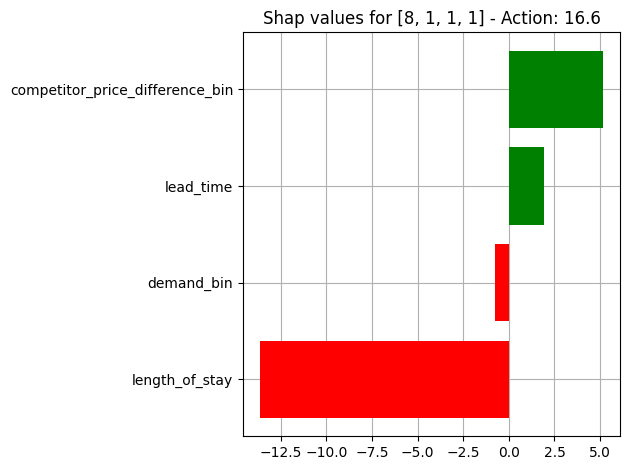

In [159]:
# Plot SHAP values
shap_values.plot_shap_values(sample=sample, shap_values=shaps, predicted_action=predicted_action,
                             fig_name="SHAP values", savefig=False)

# Performance evaluation

In [2]:
# User-defined parameters
results_path = "performance-evaluations"
num_sample_range=[int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)]
num_ep_range = [int(1e1), int(1e2), int(1e3), int(1e5)]
num_bin_range=[10, 20, 50, 100]

In [3]:
# Instantiate PerformanceEvaluator
from explainable_rl.performance.performance_evaluator import PerformanceEvaluator

performance_evaluator = PerformanceEvaluator(results_path="performance-evaluations",
                                             num_sample_range=num_sample_range,
                                             num_ep_range=num_ep_range,
                                             num_bin_range=num_bin_range,
                                             verbose=True)


GETTING BENCHMARK PERFORMANCE
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 671.23it/s]



GETTING PERFORMANCE GRAPHS
* Plot of performance vs number of samples
-> Running training loop for 10 episodes, 10 bins, 100 samples


100%|██████████| 10/10 [00:00<00:00, 721.96it/s]


-> Running training loop for 10 episodes, 10 bins, 1000 samples


100%|██████████| 10/10 [00:00<00:00, 756.14it/s]


-> Running training loop for 10 episodes, 10 bins, 10000 samples


100%|██████████| 10/10 [00:00<00:00, 689.08it/s]


-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 726.63it/s]


-> Running training loop for 10 episodes, 10 bins, 1000000 samples


100%|██████████| 10/10 [00:00<00:00, 757.93it/s]


* Plot of performance vs number of episodes
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 767.04it/s]


-> Running training loop for 100 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 766.64it/s]


-> Running training loop for 1000 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 685.55it/s]


-> Running training loop for 100000 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 785.44it/s]


* Plot of performance vs number of bins
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 707.22it/s]


-> Running training loop for 10 episodes, 20 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 765.69it/s]


-> Running training loop for 10 episodes, 50 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 770.18it/s]


-> Running training loop for 10 episodes, 100 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 708.07it/s]



GETTING TIME BREAKDOWN PER FUNCTION
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 560.38it/s]



GETTING SPACE BREAKDOWN PER FUNCTION
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 759.77it/s]


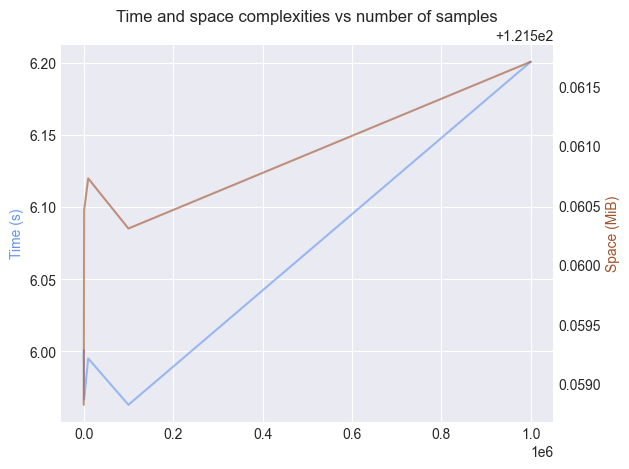

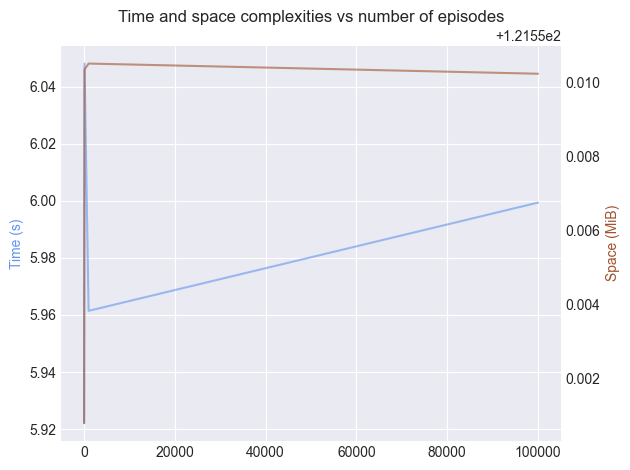

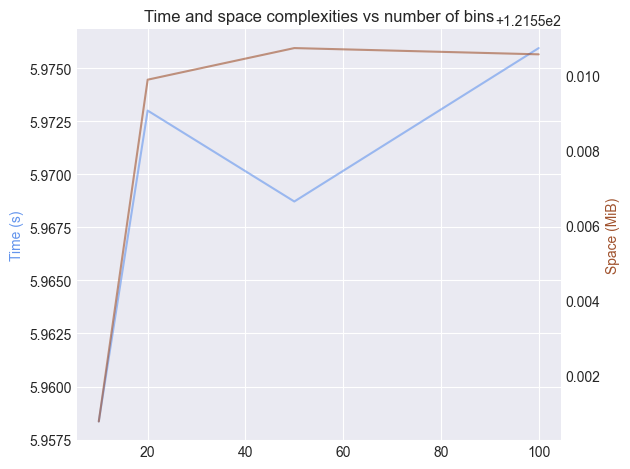

In [10]:
# Get results
performance_evaluator.get_all_performance_evaluations()

# Documentation

In [11]:
## Update documentation

# Go to documentation folder
os.chdir("documentation")

# Automatically update the documentation
! make html

# Go back to repository root
os.chdir("..")

Running Sphinx v5.0.2
loading pickled environment... done
building [mo]: targets for 0 po files that are out of date
building [html]: targets for 0 source files that are out of date
updating environment: 0 added, 0 changed, 0 removed
looking for now-outdated files... none found
no targets are out of date.
build succeeded.

The HTML pages are in _build/html.


In [12]:
## Access documentation

# Go to the html sub-folder of the documentation
os.chdir("documentation/_build/html")

# Open the documentation at the index page
! open index.html

# Go back to repository root
os.chdir("../../..")